In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
data = pd.read_csv("39-feature-vector.csv")
data

,class,0,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,anthrophony,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,...,0.070683,0.079686,0.085407,0.084761,0.075187,0.072029,0.073790,0.079146,0.084986,0.092545
1,anthrophony,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,...,0.128797,0.128452,0.136328,0.137922,0.135077,0.131882,0.124851,0.128193,0.128049,0.129284
2,anthrophony,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,...,0.140188,0.133408,0.141130,0.136032,0.134554,0.134804,0.134235,0.133575,0.133459,0.136899
3,anthrophony,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,...,0.041718,0.041547,0.050154,0.044924,0.036704,0.034917,0.036167,0.037872,0.044116,0.047740
4,anthrophony,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,...,0.124112,0.118943,0.126383,0.119483,0.116559,0.116601,0.116413,0.116972,0.119721,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,other,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,...,0.101700,0.102209,0.105817,0.106501,0.095956,0.095646,0.096040,0.097561,0.101006,0.108054
6600,other,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,...,0.148462,0.142680,0.144562,0.144662,0.132111,0.130482,0.134250,0.131713,0.133691,0.141131
6601,other,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,...,0.141598,0.142239,0.146732,0.144848,0.145634,0.149111,0.144374,0.145140,0.145477,0.149187
6602,other,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,...,0.196654,0.193573,0.197527,0.198125,0.191823,0.195113,0.193040,0.195639,0.190391,0.202831


In [3]:
features = data.iloc[:, 1:40].values
labels_true = data["class"]

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
# Load dataset
df = pd.read_csv("39-feature-vector.csv")
X = df.iloc[:, 1:14]
y = df.iloc[:, 0]
feature_names = list(X.columns)

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,0.446274,0.441296,0.449693,0.467371
1,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,0.468374,0.420703,0.436366,0.519388
2,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,0.520399,0.542907,0.546478,0.555310
3,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,0.434366,0.506749,0.481986,0.491365
4,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,0.518938,0.549619,0.575236,0.564050
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,0.568266,0.537876,0.670199,0.544612
6600,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,0.575521,0.516647,0.655967,0.567080
6601,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,0.558798,0.522613,0.676561,0.567614
6602,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,0.559814,0.532278,0.690517,0.553801


In [18]:
y

0       anthrophony
1       anthrophony
2       anthrophony
3       anthrophony
4       anthrophony
           ...     
6599          other
6600          other
6601          other
6602          other
6603          other
Name: class, Length: 6604, dtype: object

In [27]:
# df = pd.read_csv("39-features-wambiana.csv")
# df = df.dropna()
# X = df.iloc[:, 0:13]
# X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.302366,0.476718,0.878482,0.582860,0.490273,0.832582,0.448314,0.396102,0.693108,0.139327,0.650847,0.094241,0.327663
1,0.295888,0.500949,0.858542,0.631764,0.619998,0.709132,0.647218,0.423347,0.512613,0.000000,0.662707,0.195039,0.197137
2,0.330444,0.536335,0.772849,0.639081,0.567348,0.818880,0.474707,0.404804,0.589428,0.171034,0.586284,0.022259,0.253894
3,0.330896,0.504779,0.897001,0.558110,0.569466,0.848539,0.457330,0.477716,0.662608,0.082363,0.661232,0.016307,0.278772
4,0.313210,0.515772,0.977697,0.558737,0.664691,0.730027,0.517821,0.349883,0.540746,0.018404,0.395456,0.015838,0.238705
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0.301206,0.663619,0.506474,0.483446,0.339153,0.328054,0.592441,0.297489,0.325433,0.573921,0.191682,0.332554,0.353921
2233,0.381229,0.726267,0.507784,0.493554,0.343453,0.351584,0.604663,0.317996,0.361661,0.551219,0.038925,0.302636,0.402050
2234,0.301759,0.675123,0.532110,0.497538,0.385665,0.322101,0.490745,0.162315,0.240721,0.450908,0.169577,0.419651,0.388543
2235,0.352168,0.701405,0.512569,0.525775,0.360312,0.325813,0.500054,0.195244,0.298270,0.532275,0.155473,0.429573,0.356276


In [7]:
# y = df.iloc[:, 40]
# y

IndexError: single positional indexer is out-of-bounds

In [19]:
target_names = list(y.unique())
target_names

['anthrophony', 'biophony', 'geophony', 'other']

In [22]:
# from sklearn.manifold import TSNE
# X = TSNE(n_components=3, learning_rate=150, perplexity=50, verbose=2, angle=0.1, random_state=0).fit_transform(X)

c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6604 samples in 0.007s...
[t-SNE] Computed neighbors for 6604 samples in 0.376s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6604
[t-SNE] Computed conditional probabilities for sample 2000 / 6604
[t-SNE] Computed conditional probabilities for sample 3000 / 6604
[t-SNE] Computed conditional probabilities for sample 4000 / 6604
[t-SNE] Computed conditional probabilities for sample 5000 / 6604
[t-SNE] Computed conditional probabilities for sample 6000 / 6604
[t-SNE] Computed conditional probabilities for sample 6604 / 6604
[t-SNE] Mean sigma: 0.051966
[t-SNE] Computed conditional probabilities in 0.149s
[t-SNE] Iteration 50: error = 85.7866516, gradient norm = 0.0083672 (50 iterations in 2.832s)
[t-SNE] Iteration 100: error = 74.3051834, gradient norm = 0.0021364 (50 iterations in 2.555s)
[t-SNE] Iteration 150: error = 73.7252731, gradient norm = 0.0004173 (50 iterations in 2.267s)
[t-SNE] Iteration 200: error =

{'fit_time': array([0.0369978 , 0.0374999 , 0.04049897, 0.03800035, 0.03700137,
       0.0379982 , 0.03349972, 0.03950143, 0.03850007, 0.03749967]), 'score_time': array([0.01999974, 0.02300024, 0.02199984, 0.02199984, 0.02150011,
       0.02150035, 0.01999974, 0.02199864, 0.02200007, 0.02150035]), 'test_accuracy': array([0.92586989, 0.96369138, 0.98184569, 0.98033283, 0.97121212,
       0.96666667, 0.93030303, 0.98636364, 0.97878788, 0.97727273]), 'test_precision_macro': array([0.87817275, 0.95631927, 0.97816697, 0.98426937, 0.97025772,
       0.96434527, 0.88264032, 0.98492983, 0.95479937, 0.96517752]), 'test_recall_macro': array([0.91902764, 0.91299847, 0.96135462, 0.9603042 , 0.9642954 ,
       0.94831396, 0.91501506, 0.97182669, 0.98162756, 0.96957745]), 'test_f1_macro': array([0.89275064, 0.92995463, 0.96917411, 0.97105537, 0.96694634,
       0.95573726, 0.89517665, 0.97800112, 0.96660446, 0.9672146 ])}
SVM: Accuracy=0.9662, Precision=0.9519, Recall=0.9504, F1-Score=0.9493


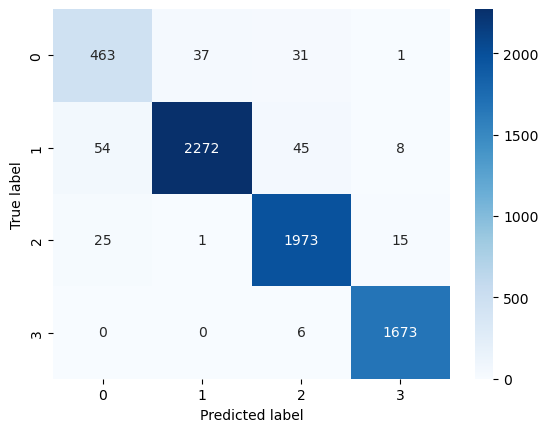

              precision    recall  f1-score   support

 anthrophony       0.85      0.87      0.86       532
    biophony       0.98      0.96      0.97      2379
    geophony       0.96      0.98      0.97      2014
       other       0.99      1.00      0.99      1679

    accuracy                           0.97      6604
   macro avg       0.95      0.95      0.95      6604
weighted avg       0.97      0.97      0.97      6604

{'fit_time': array([0.00799942, 0.00799966, 0.00850081, 0.00900078, 0.0085001 ,
       0.00900006, 0.00899959, 0.0095017 , 0.0090003 , 0.00899959]), 'score_time': array([0.00350094, 0.00349975, 0.00349927, 0.00349927, 0.00300002,
       0.00300002, 0.0030005 , 0.00299788, 0.00349998, 0.00350189]), 'test_accuracy': array([0.89107413, 0.95763994, 0.97428139, 0.97125567, 0.96060606,
       0.95757576, 0.92272727, 0.98484848, 0.93787879, 0.96818182]), 'test_precision_macro': array([0.8385361 , 0.94449911, 0.96897683, 0.96903833, 0.95427093,
       0.95154732, 0.8

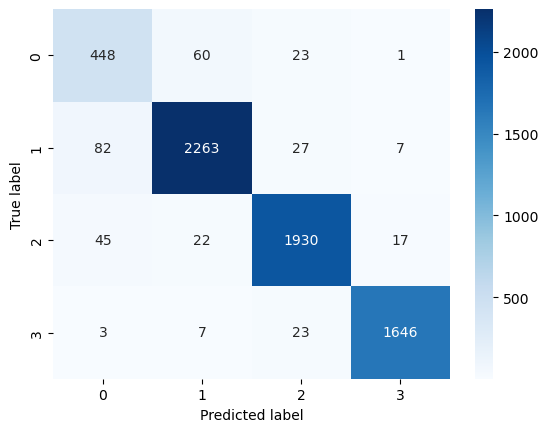

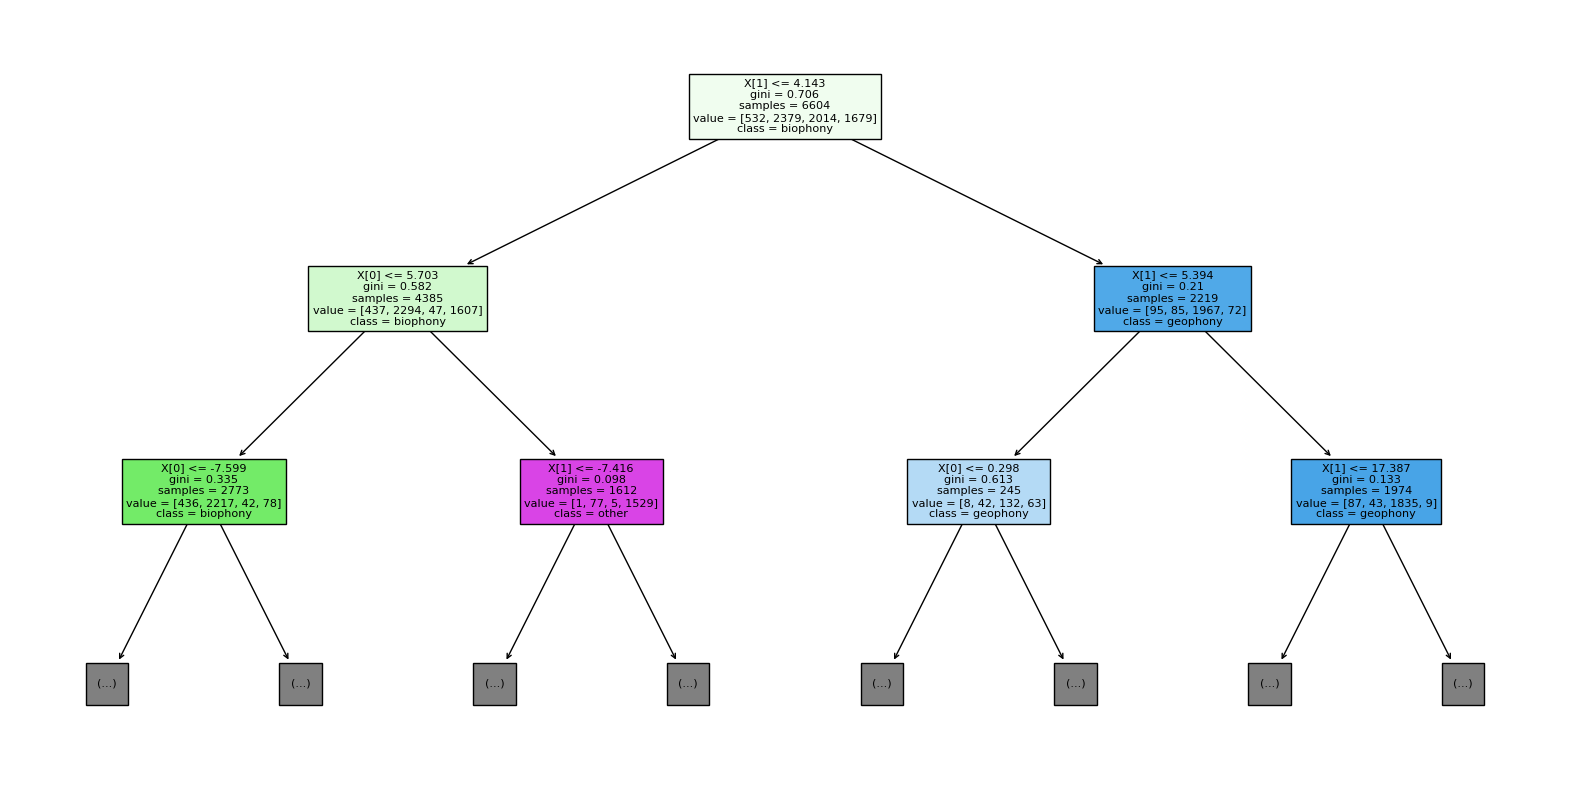

Feature importances: [0.39799877 0.48409025 0.11791098]
              precision    recall  f1-score   support

 anthrophony       0.78      0.84      0.81       532
    biophony       0.96      0.95      0.96      2379
    geophony       0.96      0.96      0.96      2014
       other       0.99      0.98      0.98      1679

    accuracy                           0.95      6604
   macro avg       0.92      0.93      0.93      6604
weighted avg       0.95      0.95      0.95      6604

{'fit_time': array([0.00349855, 0.00350142, 0.00349998, 0.00350022, 0.00349998,
       0.00349855, 0.00349832, 0.00349998, 0.00349975, 0.00350022]), 'score_time': array([0.00900006, 0.00899863, 0.00899982, 0.00850081, 0.00849986,
       0.00900221, 0.00849938, 0.00850034, 0.00849962, 0.0085001 ]), 'test_accuracy': array([0.89863843, 0.9667171 , 0.97881997, 0.98335855, 0.97727273,
       0.96666667, 0.92727273, 0.99090909, 0.97575758, 0.96363636]), 'test_precision_macro': array([0.84633253, 0.95940589, 0.

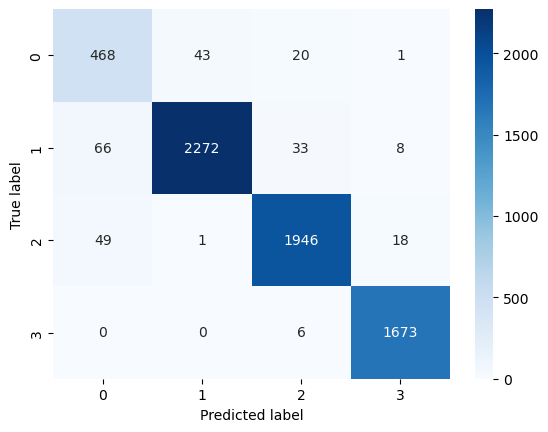

              precision    recall  f1-score   support

 anthrophony       0.80      0.88      0.84       532
    biophony       0.98      0.96      0.97      2379
    geophony       0.97      0.97      0.97      2014
       other       0.98      1.00      0.99      1679

    accuracy                           0.96      6604
   macro avg       0.93      0.95      0.94      6604
weighted avg       0.96      0.96      0.96      6604

{'fit_time': array([0.00249887, 0.00200057, 0.00200129, 0.0025003 , 0.00199962,
       0.00249958, 0.00200057, 0.00199866, 0.00199962, 0.00200009]), 'score_time': array([0.00300002, 0.00299978, 0.00299907, 0.00300002, 0.0030005 ,
       0.00299978, 0.00299954, 0.0030005 , 0.00300026, 0.00299811]), 'test_accuracy': array([0.89107413, 0.93797277, 0.9183056 , 0.87897126, 0.89090909,
       0.89545455, 0.9       , 0.93939394, 0.94545455, 0.92121212]), 'test_precision_macro': array([0.86985429, 0.94644066, 0.89573762, 0.91792024, 0.91516442,
       0.92931883, 0.8

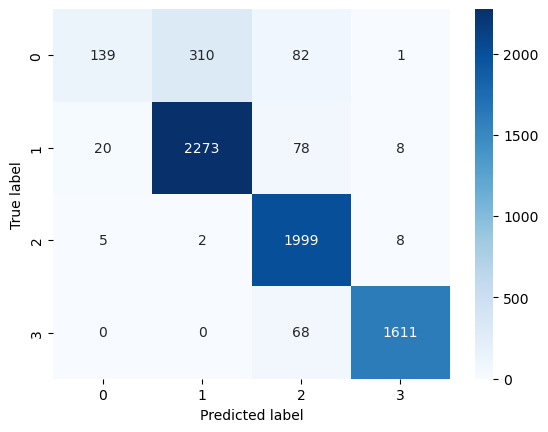

              precision    recall  f1-score   support

 anthrophony       0.85      0.26      0.40       532
    biophony       0.88      0.96      0.92      2379
    geophony       0.90      0.99      0.94      2014
       other       0.99      0.96      0.97      1679

    accuracy                           0.91      6604
   macro avg       0.90      0.79      0.81      6604
weighted avg       0.91      0.91      0.90      6604



In [24]:
from sklearn import svm, tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

classifiers = {
    'SVM': svm.SVC(),
    'DT': tree.DecisionTreeClassifier(),
    #'ANN': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)),
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Bayes': GaussianNB()
}

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for name, clf in classifiers.items():
    cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)
    print(cv_results)
    acc = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    f1 = cv_results['test_f1_macro'].mean()
    print(f"{name}: Accuracy={acc:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

    y_pred = cross_val_predict(clf, X, y, cv=10)
    cm = confusion_matrix(y, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    # Generate decision tree diagram and feature importance for DT classifier
    if name == 'DT':
        clf.fit(X, y)  # Fit the model before accessing feature importances
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, class_names=target_names, max_depth=2)
        plt.show()
        print(f"Feature importances: {clf.feature_importances_}")
    
    print(classification_report(y, y_pred, target_names=target_names))